In [6]:
import cv2


In [7]:
cv2.__version__

'4.5.4'

In [1]:
from easyocr import Reader

C:\Users\rajen\anaconda3\envs\requirements\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [4]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rajen\\anaconda3\\envs\\requirements\\Lib\\site-packages\\cv2\\cv2.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



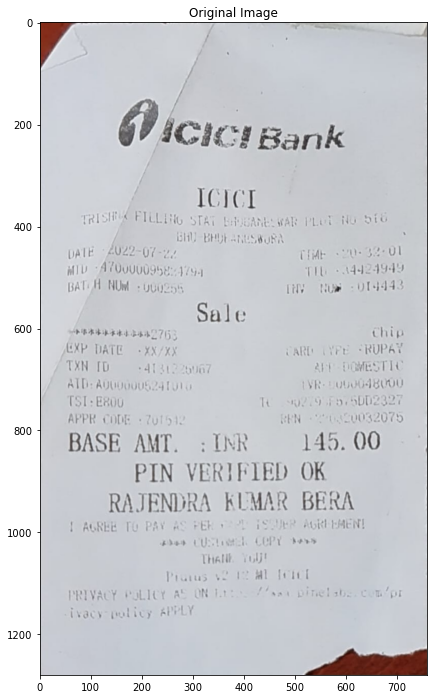

Using CPU. Note: This module is much faster with a GPU.


Detecting and OCR'ing text from input image...
Completed in 10.259629964828491 seconds


In [10]:
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# load the input image from disk
image = cv2.imread("C:/Users/rajen/Computer Vision/images/images/WhatsApp Image 2022-08-09 at 11.35.35 PM.jpeg")
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = False)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

 Probability of Text: 10.534% OCR'd Text: D
 Probability of Text: 99.819% OCR'd Text: Bank
 Probability of Text: 50.752% OCR'd Text: ICICI
 Probability of Text: 43.531% OCR'd Text: rl
 Probability of Text: 6.223% OCR'd Text: FILL{HlG STni !#twAl: VLu:
 Probability of Text: 20.419% OCR'd Text: ilu Ji"
 Probability of Text: 1.066% OCR'd Text: #h; MAWH -Naduk;
 Probability of Text: 20.356% OCR'd Text: 2uzz-0(
 Probability of Text: 8.200% OCR'd Text: CmMe
 Probability of Text: 52.682% OCR'd Text: %ui
 Probability of Text: 6.266% OCR'd Text: Azunuinys":1'1-1
 Probability of Text: 19.144% OCR'd Text: M
 Probability of Text: 19.687% OCR'd Text: 444244414
 Probability of Text: 19.483% OCR'd Text: H NUM
 Probability of Text: 10.546% OCR'd Text: Uuus"
 Probability of Text: 33.594% OCR'd Text: Til
 Probability of Text: 14.882% OCR'd Text: Mua
 Probability of Text: 7.430% OCR'd Text: 1[+14}
 Probability of Text: 70.605% OCR'd Text: Su] e
 Probability of Text: 0.920% OCR'd Text: Mtt4|
 Probability 

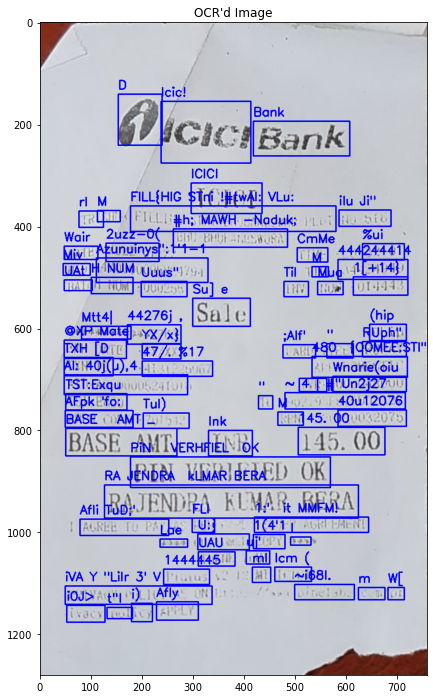

In [11]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 12)